## Problem 1. Clustering with the k-Means algorithm

In [30]:
import numpy as np
import random as rd

In [31]:
# Problem 1 (a)
def euclidean_distance(a, b):
    """ 
    Takes two vectors and returns the Euclidean distance between them 
    Input: a - input vector a
           b - input vector b
    Output: the Euclidean distance between vectors a and b
    """
    # TODO: Write your solution here
    dist = np.linalg.norm(a - b)
    return dist

In [178]:
# Problem 1 (b)
def kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance):
    """
    K-Means clustering algorithm. 
    Input: X - input data        (comments are intentionally removed)
           K - number of cluster
           max_iter - maximum number of iteration to adjust membership and centroid
           tol - tol is a variable to stop iteration when the change in sse is very small.
           distance_metric -  we can set the distance metric to calculate distance between data point and centroid
    Output: c - membership of cluster        (comments are intentionally removed)
            centroids - array of centroid
            log_centroids - Records of centroids adjusted for each Iteration.
            log_c - Records of cluster's membership adjusted for each Iteration.
            log_sse -  Records of SSE value calculated for each Iteration.
    """
    
    N, d = X.shape
    
    centroids = np.zeros((K, d))
    
    sse = np.Inf    # sum of squared error (objective)
    
    # for bookkeeping
    log_sse = []
    log_c = []
    log_centroids = []

    # initialization
    for k in range(K):
        rand_index = rd.randint(0, N-1)
        centroids[k] = X[rand_index]
#     log_centroids.append(centroids)
    
    # main process
    for i in range(max_iter):
        
        # update the cluster membership
        c = []
        for n in range(N):
            dist_to_centroids = []
            
            for k in range(K):
                dist_to_centroids.append(distance_metric(X[n], centroids[k]))
            
            c.append(np.argmin(dist_to_centroids)) # cluster membership
        log_c.append(c)
        
        # update the centroids
        prev_centroids = centroids  # bookkeeping
        centroids = np.zeros((K, d))
        for k in range(K):
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N):
                if c[n] == k:
                    tmp_sum += X[n]
                    tmp_count += 1
            centroids[k] = tmp_sum / tmp_count
        log_centroids.append(centroids)
        
        # estimate the sum of the squared errors (sse)
        prev_sse = sse  # bookkeeping
        sse = 0
        for n in range(N):
            sse += distance_metric(X[n], centroids[c[n]]) ** 2
        log_sse.append(sse)
        
        # stopping criterion
        if prev_sse - sse < tol:
            break
    
    return c, centroids, log_centroids, log_c, log_sse
    

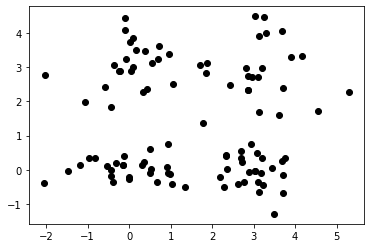

In [179]:
# Problem 1 (c)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

def generate_random_data(N=100):
    """ 
    Generate a random dataset (multivariate normal) 
    Input: N - number of instances to create
    Output: X - generated (synthetic) dataset
    """
    
    means = [[0, 0], [3, 3], [0, 3], [3, 0]]
    covs = [[[0.5, 0], [0, 0.1]], [[0.5, 0], [0, 0.5]], 
            [[0.5, 0], [0, 1.0]], [[0.3, 0], [0, 0.3]]]

    X = np.zeros((N, 2))
    for n in range(N):
        seed = rd.randint(0, 3)
        X[n] = np.random.multivariate_normal(means[seed], covs[seed])
    
    return X

X = generate_random_data()
plt.scatter(X[:,0], X[:,1], c='k')


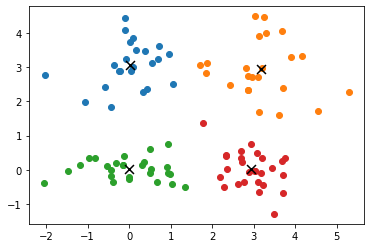

In [180]:
# Problem 3 (c) - part 1
""" TODO: Write your solution here """
c, centroids, log_centroids, log_c, log_sse = kmeans(X, 4)
u_labels = np.unique(c)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[c == i , 0] , X[c == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k', marker = 'x')
#plt.legend()
plt.show()

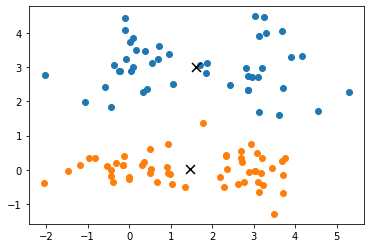

In [181]:
# Problem 3 (c) - part 2
""" TODO: Write your solution here """
c, centroids, log_centroids, log_c, log_sse = kmeans(X, 2)
u_labels = np.unique(c)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[c == i , 0] , X[c == i , 1] , label = i)
#plt.legend()
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k', marker = 'x')
plt.show()

In [193]:
X[1]

array([-0.44078973, -0.16493808])

**Problem 1 (c) - part3** \
I think k=4 is better than k =2. 

In [182]:
# Problem 1 (d)
def normalize(X):
    """
    mean-std normalization (standardization)
    Takes and applies a normalization on the input matrix X
    Input: X - data matrix (numpy array)
    Output: X_normalized - normalized data matrix
    """
    return (X - X.mean(axis=0)) / X.std(axis=0)


my_data = np.genfromtxt('Mall_Customers.csv', delimiter=',', skip_header=1)
# print(my_data)
N, d = my_data.shape
print(N)
print(d)

from scipy import stats

stats.describe(my_data)

200
4


DescribeResult(nobs=200, minmax=(array([ 0., 18., 15.,  1.]), array([  1.,  70., 137.,  99.])), mean=array([ 0.56, 38.85, 60.56, 50.2 ]), variance=array([2.47638191e-01, 1.95133166e+02, 6.89835578e+02, 6.66854271e+02]), skewness=array([-0.24174689,  0.48191947,  0.31942368, -0.04686531]), kurtosis=array([-1.94155844, -0.68475139, -0.12589283, -0.83595827]))

In [110]:
stats.describe(normalize(my_data))

DescribeResult(nobs=200, minmax=(array([-1.12815215, -1.49633548, -1.73899919, -1.91002079]), array([0.88640526, 2.23553238, 2.91767117, 1.89449216])), mean=array([-8.88178420e-17,  3.33066907e-18, -2.57571742e-16, -1.22124533e-17]), variance=array([1.00502513, 1.00502513, 1.00502513, 1.00502513]), skewness=array([-0.24174689,  0.48191947,  0.31942368, -0.04686531]), kurtosis=array([-1.94155844, -0.68475139, -0.12589283, -0.83595827]))

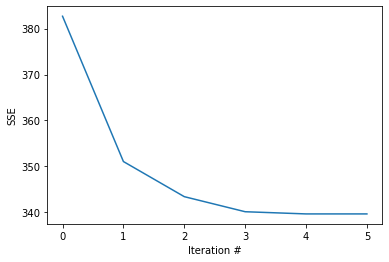

In [131]:
# Problem 1 (e)
""" TODO: Write your solution here """
my_data = normalize(my_data)
c, centroids, log_centroids, log_c, log_sse = kmeans(my_data, 5)
plt.figure()
plt.xlabel("Iteration #")
plt.ylabel("SSE")
plt.plot(range(len(log_sse)), log_sse)
plt.show()

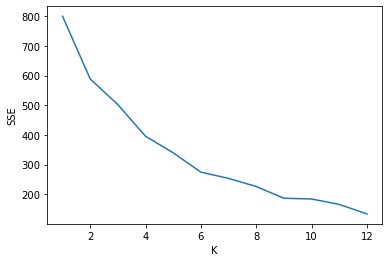

In [142]:
# Problem 1 (f)
""" TODO: Write your solution here """
sses =[]
for k in range(1,13):
    c, centroids, log_centroids, log_c, log_sse = kmeans(my_data, k)
    sses.append(log_sse[-1])  
plt.figure()
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(range(1,13), sses)
plt.show()

In [199]:
# Problem 1 (f)
dic ={}
for k in range(1,13):
    c, centroids, log_centroids, log_c, log_sse = kmeans(my_data, k)
    labels = np.unique(c)
    for i in labels:
        dic[i] = np.std(my_data[c==i])
    print(dic)

{0: 30.015590844592747}
{0: 26.915630464257095, 1: 37.01185038932427}
{0: 34.21484221257756, 1: 36.98274870141703, 2: 24.530549947478928}
{0: 27.374844961719887, 1: 36.98274870141703, 2: 38.80680065164622, 3: 24.640475902180754}
{0: 36.98274870141703, 1: 34.42316848945166, 2: 28.84736383103316, 3: 23.592298814775365, 4: 18.70356253278421}
{0: 36.98274870141703, 1: 19.787016997684788, 2: 23.82067315067564, 3: 34.42316848945166, 4: 28.61310991786104, 5: 17.253180061143}
{0: 34.42316848945166, 1: 23.54487437309502, 2: 16.347918456789003, 3: 28.39017990106464, 4: 19.787016997684788, 5: 41.83944957592447, 6: 31.793920724907906}
{0: 18.244139866153798, 1: 35.46136443154633, 2: 22.942304449395518, 3: 41.75616720916804, 4: 29.575594329762467, 5: 31.251577560180863, 6: 23.757501089649377, 7: 47.23346271447817}
{0: 35.5554877386506, 1: 29.575594329762467, 2: 23.82726665741659, 3: 44.16295065931963, 4: 22.88164677089779, 5: 18.32998928617813, 6: 31.040320218869212, 7: 34.4331584377617, 8: 41.7561

In [198]:
dic

{0: 14.605136082899056,
 1: 22.722130188698745,
 2: 35.96442686878244,
 3: 35.40545955184035,
 4: 20.8597378245599,
 5: 44.16295065931963,
 6: 25.212723095605753,
 7: 29.575594329762467,
 8: 31.550444617398906,
 9: 20.89866340777335,
 10: 24.627780754191868,
 11: 36.428053139792624}

In [158]:
stats.describe(normalize(my_data))

DescribeResult(nobs=200, minmax=(array([-1.12815215, -1.49633548, -1.73899919, -1.91002079]), array([0.88640526, 2.23553238, 2.91767117, 1.89449216])), mean=array([-2.88657986e-17,  3.33066907e-18,  3.81916720e-16, -8.88178420e-18]), variance=array([1.00502513, 1.00502513, 1.00502513, 1.00502513]), skewness=array([-0.24174689,  0.48191947,  0.31942368, -0.04686531]), kurtosis=array([-1.94155844, -0.68475139, -0.12589283, -0.83595827]))

In [171]:
# Problem 1 (g) - Extra point
""" TODO: You may copy the kmeans() function from Problem 1(b) to here
         and modify it from this cell """
def modified_kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance):

    # np.seterr(divide='ignore', invalid='ignore')
    N, d = X.shape
    
    centroids = np.zeros((K, d))
    
    sse = np.Inf    # sum of squared error (objective)
    
    # for bookkeeping
    log_sse = []
    log_c = []
    log_centroids = []
    rand_final = []
    
    # initialization
    for k in range(K):
        
        while 1:
            rand_index = rd.randint(0, N-1)
            if rand_index not in rand_final:
                centroids[k] = X[rand_index]
                rand_final.append(rand_index)
                break
            
#     log_centroids.append(centroids)
    
    # main process
    for i in range(max_iter):
        
        # update the cluster membership
        c = []
        for n in range(N):
            dist_to_centroids = []
            
            for k in range(K):
                dist_to_centroids.append(distance_metric(X[n], centroids[k]))
            
            c.append(np.argmin(dist_to_centroids)) # cluster membership
        log_c.append(c)
        
        # update the centroids
        prev_centroids = centroids  # bookkeeping
        centroids = np.zeros((K, d))
        for k in range(K):
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N):
                if c[n] == k:
                    tmp_sum += X[n]
                    tmp_count += 1
            centroids[k] = tmp_sum / tmp_count
        log_centroids.append(centroids)
        
        # estimate the sum of the squared errors (sse)
        prev_sse = sse  # bookkeeping
        sse = 0
        for n in range(N):
            sse += distance_metric(X[n], centroids[c[n]]) ** 2
        log_sse.append(sse)
        
        # stopping criterion
        if prev_sse - sse < tol:
            break
    
    return c, centroids, log_centroids, log_c, log_sse
    

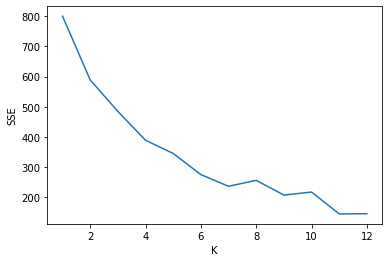

In [172]:
sses =[]
for k in range(1,13):
    c, centroids, log_centroids, log_c, log_sse = modified_kmeans(my_data, k)
    sses.append(log_sse[-1])  
plt.figure()
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(range(1,13), sses)
plt.show()

## Problem 2. Image segmentation using k-Means

In [184]:
!pip install opencv-python
import cv2

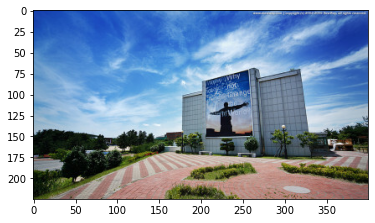

In [200]:
# Read an image file and convert it to an RGB image
img = cv2.imread('hyoam.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [201]:
# Convert the RGB image into an RGB matrix
X_rgb = np.float32(img.reshape((-1,3)))
print(X_rgb)

[[ 23.  61. 170.]
 [ 23.  61. 170.]
 [ 22.  63. 171.]
 ...
 [150.  94.  95.]
 [145.  94.  93.]
 [140.  99.  97.]]


In [202]:
""" TODO: Perform an image segmentation using the provided kmeans algorithm and show your results when k = 3, 6, 9 """
c, centroids, log_centroids, log_c, log_sse = modified_kmeans(X_rgb, 3)

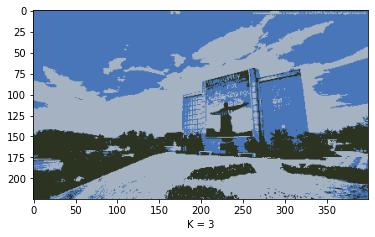

In [203]:
centroids = np.uint8(centroids)
segmented_image = centroids[c]

segmented_image = segmented_image.reshape(img.shape)
plt.imshow(segmented_image)
plt.xlabel("K = 3")
plt.show()

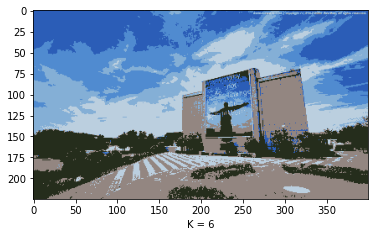

In [189]:
c, centroids, log_centroids, log_c, log_sse = modified_kmeans(X_rgb, 6)
centroids = np.uint8(centroids)
segmented_image = centroids[c]

segmented_image = segmented_image.reshape(img.shape)
plt.imshow(segmented_image)
plt.xlabel("K = 6")
plt.show()

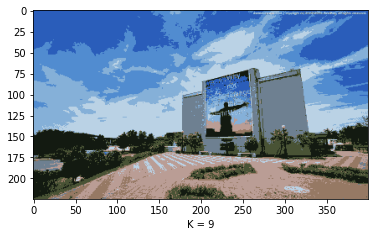

In [190]:
c, centroids, log_centroids, log_c, log_sse = modified_kmeans(X_rgb, 9)
centroids = np.uint8(centroids)
segmented_image = centroids[c]

segmented_image = segmented_image.reshape(img.shape)
plt.imshow(segmented_image)
plt.xlabel("K = 9")
plt.show()

## Problem 3. Linear regression

In [16]:
# Problem 3 supplements: Additional function(s) required for this assignment
def normalize_mv(X, mu=None, sigma=None):
    """
    Normalizes input matrix X.
    If mu and sigma are provided, this function normalizes X using them.
    Otherwise, the function first estimates mu and sigma from X, and then normalizes X.
    Input: X - input matrix
           mu - a vector of column-wise mean values (can be omitted)
           sigma - a vector of column-wise standard deviation values (can be omitted)
    Output: 
    """
    if mu is None and sigma is None:
        mu = X.mean(axis=0)
        sigma = X.std(axis=0)
    return (X - mu)/sigma, mu, sigma


def get_rmse(y_true, y_pred):
    """
    Measures the regression error using root-mean-square error (RMSE)
    Input: Y_true - true output (ground truth)
           Y_pred - predicted output
    return a floating point number representing RMSE
    """
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [ ]:
# Problem 3 supplements: Data preparation for Problem 3.
# load data
data_tr = np.genfromtxt('boston_houses_train.csv', delimiter=',', skip_header=1)
data_ts = np.genfromtxt('boston_houses_test.csv', delimiter=',', skip_header=1)

# normalization
X_tr, mu_tr, sigma_tr = normalize_mv(data_tr[:, :-1])
y_tr = data_tr[:, -1].astype(np.float64)
X_ts, _, _ = normalize_mv(data_ts[:, :-1], mu_tr, sigma_tr)
y_ts = data_ts[:, -1].astype(np.float64)

print(X_tr.shape)
print(y_tr.shape)
print(X_ts.shape)
print(y_ts.shape)

In [18]:
# Problem 3 (a) - Implement compute_cost()
def compute_cost(X, y, w):
    """
    compute_cost (= compute the error function J(w,D))
    Input: X - Input attributes
           y - Target values
           w - model weights
    Output: cost computed given (X, y) and w (i.e., evaluation of function J())
    """
    
    # TODO: Complete this function

In [19]:
# Problem 3 (a) - Your compute_cost() should work with the following functions
def gradient_descent(X, y, w, alpha, n_iters, threshold=1e-07):
    """
    gradient_descent
    Input: X, y, w, alpha, n_iters
    Output: 
    """
    N = len(y)
    log_j = []
    j_last = np.Inf

    for i in range(n_iters):
        w_new = w - (-2*alpha/N * X.T @ (y - X @ w))
        j_new = compute_cost(X, y, w)
        
        if j_last - j_new < threshold:
            break
            
        w = w_new
        log_j.append(j_new)
        j_last = j_new

    return w, log_j


def train_linreg(X_tr, y_tr, alpha=0.01, n_iters=1500):
    """
    train_linreg
    Input: X_tr - Training input attributes
           y_tr - Training target values
           alpha - learning rate alpha (default: 0.01)
           n_iters - number of iterations (default: 1500)
    Output: w_star - trained model weights
            log_j - cost history
    """
    N_tr, d_tr = X_tr.shape
    
    X_tr_b = np.hstack((X_tr, np.ones((N_tr, 1))))
    w_init = np.zeros(d_tr + 1)  # np.random.rand(d_tr + 1)
    
    initial_cost = compute_cost(X_tr_b, y_tr, w_init)
    print("Initial J(w_init, D_tr) is: ", initial_cost, "\n")
    
    w_star, log_j = gradient_descent(X_tr_b, y_tr, w_init, alpha, n_iters)
    
    print("w*: \n", w_star, "\n")
    print("J(w*, D_tr): ", log_j[-1])
    
    return w_star, log_j

In [ ]:
# Problem 3 (b) Execute this code cell, after implementing compute_cost(X, y, w)

Model_linreg, log_j_linreg = train_linreg(X_tr, y_tr, 0.005, 3000)

plt.plot(range(len(log_j_linreg)), log_j_linreg, 'r')
plt.title('learning_curve')
plt.ylabel('Cost')
plt.xlabel('#Iterations')
plt.show()

In [21]:
# Problem 3 (c) Implement the predict_linreg(X, w) below.
def predict_linreg(X, w):
    """
    predict_linreg
    Input: X - Input attributes to predict the target output
           w - Trained model weights
    Output: y_pred - predicted target values
    """
    
    # TODO: Complete this function
    
    return y_pred

In [ ]:
# Problem 3 (d)
# prediction
y_tr_pred = predict_linreg(X_tr, Model_linreg)
y_ts_pred = predict_linreg(X_ts, Model_linreg)

# print out the results
print(get_rmse(y_tr, y_tr_pred))
print(get_rmse(y_ts, y_ts_pred))

# Draw scatter plots that compare true and predicted target values
# (blue dots for y_tr; oranges dots for y_ts)
plt.scatter(y_tr,y_tr_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Training data')

plt.scatter(y_ts,y_ts_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Testing data')

plt.axline((-100, -100), (100, 100), c='grey', lw=1)
plt.ylim(-10, 55)
plt.xlim(-10, 55)

In [ ]:
# Problem 3 (e)
from sklearn.preprocessing import PolynomialFeatures

# TODO: Apply the polynomial feature function
#       and create X_tr_ext from X_tr, and
#                  X_ts_ext from X_ts





""" You do NOT need to modify the rest of the code cell """

# training
Model_linreg, log_j_linreg = train_linreg(X_tr_ext, y_tr, 0.005, 3000)

# prediction
y_tr_pred = predict_linreg(X_tr_ext, Model_linreg)
y_ts_pred = predict_linreg(X_ts_ext, Model_linreg)

print(get_rmse(y_tr, y_tr_pred))
print(get_rmse(y_ts, y_ts_pred))

# drawing a scatter plot of prediction
plt.scatter(y_tr,y_tr_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Training data')

plt.scatter(y_ts,y_ts_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Testing data')

plt.axline((-100, -100), (100, 100), c='grey', lw=1)
plt.ylim(-10, 55)
plt.xlim(-10, 55)

In [ ]:
# Problem 3 (g, h)
def compute_cost_l2(X, y, w, l):
    """
    compute_cost_l2 L2-regularized cost function (= compute the error function J_l2(w,D))
    Input: X - Input attributes
           y - Target values
           w - model weights
    Output: cost computed given (X, y) and w (i.e., evaluation of function J())
    """
    
    # TODO: Complete this function
    
    return cost


def gradient_descent_l2(X, y, w, l, alpha, n_iters, threshold=1e-07):
    """
    gradient_descent
    Input: X, y, w, alpha, n_iters
    Output: 
    """
    N = len(y)
    log_j = []
    j_last = np.Inf

    for i in range(n_iters):
        w_new = w - (-2*alpha/N * X.T @ (y - X @ w) + l*w.sum())
        
        j_new = compute_cost_l2(X, y, w, l)
        
        if j_last - j_new < threshold:
            break
            
        w = w_new
        log_j.append(j_new)
        j_last = j_new

    return w, log_j


def train_linreg_l2(X_tr, y_tr, l=1.0, alpha=0.01, n_iters=1500):
    """
    train_linreg
    Input: X_tr - Training input attributes
           y_tr - Training target values
           l - regularization parameter lambda (default: 1.0)
           alpha - learning rate alpha (default: 0.01)
           n_iters - number of iterations (default: 1500)
    Output: w_star - trained model weights
            log_j - cost history
    """
    N_tr, d_tr = X_tr.shape
    
    X_tr_b = np.hstack((X_tr, np.ones((N_tr, 1))))
    w_init = np.zeros(d_tr + 1)  # np.random.rand(d_tr + 1)
    
    initial_cost = compute_cost_l2(X_tr_b, y_tr, w_init, l)
    print("Initial J(w_init, D_tr) is: ", initial_cost, "\n")
    
    w_star, log_j = gradient_descent_l2(X_tr_b, y_tr, w_init, l, alpha, n_iters)
    
    print("w*: \n", w_star, "\n")
    print("J(w*, D_tr): ", log_j[-1])
    
    return w_star, log_j


# Training a L2-regularized LinReg
Model_l2, log_j_l2 = train_linreg_l2(X_tr, y_tr, 0.001, 0.05, 3000)

plt.plot(range(len(log_j_l2)), log_j_l2, 'r')
plt.title('learning_curve')
plt.ylabel('Cost')
plt.xlabel('#Iterations')
plt.show()

# prediction
y_tr_pred_l2 = predict_linreg(X_tr, Model_l2)
y_ts_pred_l2 = predict_linreg(X_ts, Model_l2)

print(get_rmse(y_tr, y_tr_pred_l2))
print(get_rmse(y_ts, y_ts_pred_l2))

# drawing a scatter plot of prediction
plt.scatter(y_tr,y_tr_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Training data')

plt.scatter(y_ts,y_ts_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Testing data')

plt.axline((-100, -100), (100, 100), c='grey', lw=1)
plt.ylim(-10, 55)
plt.xlim(-10, 55)
plt.show()


In [ ]:
# Problem 3 (i) - Perform a 5-fold crossvalidation
#                 to find the best hyperparameter combination
